In [71]:
# -------------------------------- Importações ------------------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [72]:
# ---------------------------- Importando os dados --------------------------- #
df1 = pd.read_csv('dados/dadosNum=200.csv', header=None)

df1

,0,1,2
0,0,200,0
1,1,170,15
2,2,162,19
3,3,150,25
4,4,150,25
...,...,...,...
14996,14996,4,98
14997,14997,4,98
14998,14998,4,98
14999,14999,4,98


In [73]:
# ------------------------- Igualando as porcentagens ------------------------ #
eixo_x = np.array(df1[0], dtype=np.float128) * 1e-4

eixo_y1 = np.array(df1[1], dtype=np.float128)
eixo_y2 = np.array(df1[2], dtype=np.float128)

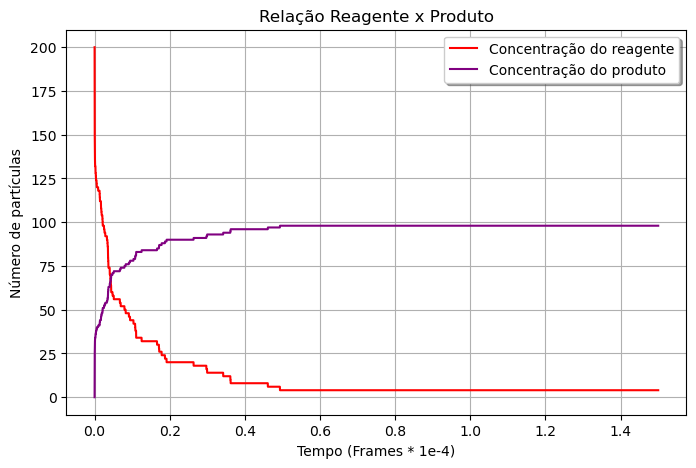

In [74]:
# ---------------------- Plotando os dados da simulação ---------------------- #
plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Número de partículas')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente', color='red')
plt.plot(eixo_x, eixo_y2, label='Concentração do produto', color='purple')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [75]:
# ----------------------- Fitando a função do reagente ----------------------- #
def funcReag(x, a, b):
    return a * np.exp(-b * x)

params1, _ = optimize.curve_fit(funcReag, eixo_x, eixo_y1)

print("Parâmetros otimizados:", params1)

Parâmetros otimizados: [110.94140318   8.14425129]


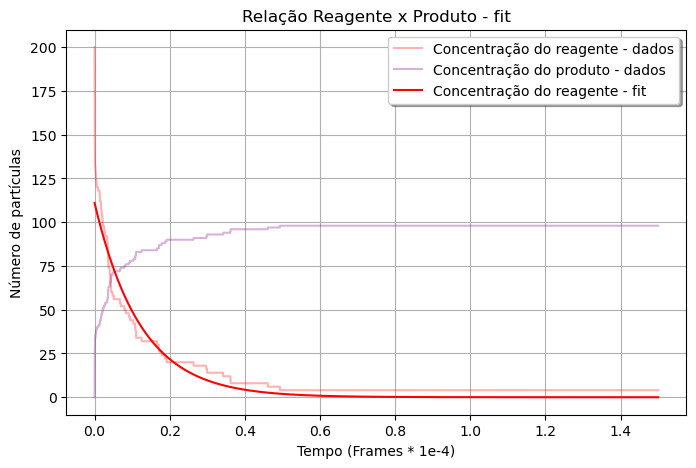

In [76]:
# --------------- Plotando interpolação dos dados da simulação --------------- #
fit_y1 = funcReag(eixo_x, *params1)

plt.figure(figsize=(8,5))

plt.title('Relação Reagente x Produto - fit')

plt.xlabel('Tempo (Frames * 1e-4)')
plt.ylabel('Número de partículas')

plt.plot(eixo_x, eixo_y1, label='Concentração do reagente - dados', color='red', alpha=.3)
plt.plot(eixo_x, eixo_y2, label='Concentração do produto - dados', color='purple', alpha=.3)

plt.plot(eixo_x, fit_y1, label="Concentração do reagente - fit", color='red')

plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

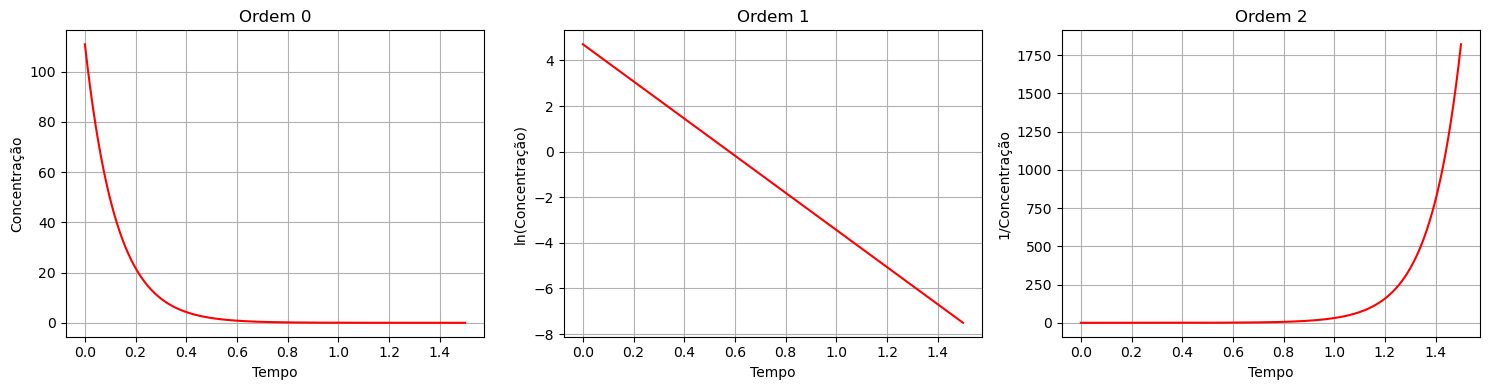

In [77]:
# ------- Analisando os três gráficos para determinar a ordem de reação ------ #
ordem0 = fit_y1
ordem1 = np.log(fit_y1)
ordem2 = 1/fit_y1

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].set_title('Ordem 0')
axes[0].set_xlabel('Tempo')
axes[0].set_ylabel('Concentração')
axes[0].grid()

axes[0].plot(eixo_x, ordem0, 'r')

axes[1].set_title('Ordem 1')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('ln(Concentração)')
axes[1].grid()

axes[1].plot(eixo_x, ordem1, 'r')

axes[2].set_title('Ordem 2')
axes[2].set_xlabel('Tempo')
axes[2].set_ylabel('1/Concentração')
axes[2].grid()

axes[2].plot(eixo_x, ordem2, 'r')

fig.tight_layout()

plt.show()